In [1]:
%matplotlib inline
# Load the "autoreload" extension
%load_ext autoreload
# always reload modules
%autoreload 2
# black formatter for jupyter notebooks
#%load_ext nb_black
# black formatter for jupyter lab
%load_ext lab_black

%run ../../src/notebook_env.py


---------------------------------
Working on the host: Joachims-MacBook-Pro.local

---------------------------------
Python version: 3.10.2 | packaged by conda-forge | (main, Feb  1 2022, 19:30:18) [Clang 11.1.0 ]

---------------------------------
Python interpreter: /opt/miniconda3/envs/srh/bin/python


# Stetige Zufallsvariablen und ihre Wahrscheinlichkeitsverteilungen

Eine <a href="https://de.wikipedia.org/wiki/Zufallsvariable">Zufallsvariable</a>, deren Werte nicht abzählbar sind, nennt man eine **stetige Zufallsvariable**. D.h. eine kontinuierliche Zufallsvariable kann jeden Wert annehmen (z.B. reelle Zahlenwerte), der in einem oder mehreren Intervallen enthalten ist. Da die Anzahl der in einem Intervall enthaltenen Werte unendlich ist, ist auch die mögliche Anzahl der Werte, die eine kontinuierliche Zufallsvariable annehmen kann, unendlich ({cite:p}`fahrmeirstatistik` s.251).

Es gibt viel mehr <a href="https://de.wikipedia.org/wiki/Liste_univariater_Wahrscheinlichkeitsverteilungen">kontinuierliche Wahrscheinlichkeitsverteilungen</a>, als wir hier besprechen können. Beachten Sie jedoch, dass in Python mittlerweile eine große Anzahl verschiedener diskreter und kontinuierlicher Wahrscheinlichkeitsverteilungen implementiert sind, siehe <a href="https://docs.scipy.org/doc/scipy/reference/stats.html">hier</a>.

 In Python sind Wahrscheinlichkeitsfunktionen durch allgemeine Methoden wie `rvs`, `pdf`, `cdf` und `ppf` zugänglich. `rvs` ist das allgemeine Syntax für Zufallsvariablengeneratoren wie `uniform.rvs()` für die Gleichverteilung oder `norm.rvs()` für die Normalverteilung. `pdf` ist Methode für die Wahrscheinlichkeitsdichtefunktion wie `uniform.pdf` und `norm.pdf()`. Das `cdf` ist der Syntax für die kumulative Dichtefunktion wie `uniform.cdf()` und `norm.cdf()`. Das `ppf` ist der allgemeine Syntax für die Quantilfunktion, wie `uniform.ppf()` und `norm.ppf()`. Behalten Sie das im Hinterkopf, wenn wir die Kapazitäten in Python weiter erforschen.

## Wahrscheinlichkeitsdichtefunktionen

Die Form der Verteilung einer Zufallsvariablen kann durch eine glatte Kurve veranschaulicht werden. Solche Kurven, die die Verteilung von kontinuierlichen Variablen darstellen, werden **Wahrscheinlichkeitsdichtefunktionen (PDF)** oder einfach **Dichtefunktionen** genannt. <a href="https://de.wikipedia.org/wiki/Wahrscheinlichkeitsdichtefunktion">Wahrscheinlichkeitsdichtefunktionen</a> haben drei Haupteigenschaften ({cite:p}`Papula2011` s.327):

1) Eine PDF wird immer auf oder über der horizontalen Achse gezeichnet

2) Die Gesamtfläche zwischen einer PDF und der horizontalen Achse ist gleich $1$ und somit liegt  jeder Wert in jedem Teilintervall der PDF im Bereich von $0$ bis $1$

3) Alle möglichen Beobachtungen der Variablen, die innerhalb eines bestimmten Bereichs liegen, entsprechen der entsprechenden Fläche unter der Dichtefunktion und können als prozentueller Anteil ausgedrückt werden.

Die Fläche unter der Kurve wird durch das Integral des Wertes $x$ von $-\infty$ bis $+\infty$ berechnet und in der Regel auf den Wert $1$ normiert. 

$$ \int_{-\infty}^{+\infty} f(x)dx = 1 $$

Text(2, 0.4, '$\\int_{-\\infty}^\\infty f(x)dx=1$')

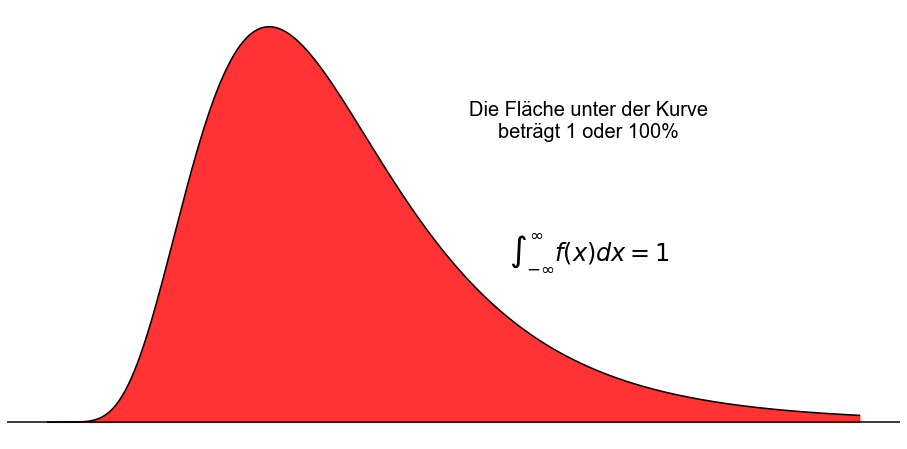

In [2]:
from scipy.stats import f
import numpy as np
import matplotlib.pyplot as plt

v1 = 20
v2 = 20
x = np.linspace(0, 3, 1000)
fig, ax = plt.subplots(figsize=(16, 8))
ax.plot(x, f.pdf(x, v1, v2), color="k")
# ax.fill_between(x, f.pdf(x), where=x <= z, color="r", alpha=0.5)
ax.fill_between(x, f.pdf(x, dfn=v1, dfd=v2), color="r", alpha=0.8)
ax.axhline(0, color="k")
ax.axes.axis("off")

ax.text(
    2,
    0.7,
    s="Die Fläche unter der Kurve\nbeträgt 1 oder 100%",
    horizontalalignment="center",
    size=20,
)

ax.text(
    2,
    0.4,
    s=r"$\int_{-\infty}^\infty f(x)dx=1$",
    horizontalalignment="center",
    size=24,
)

Die Wahrscheinlichkeit, dass eine stetige Zufallsvariable $x$ einen Wert innerhalb eines bestimmten Intervalls annimmt, ist durch die Fläche unter der Kurve zwischen den beiden Grenzen des Intervalls gegeben. Die farbige Fläche unter der Kurve für das Intervall $]-\infty \ $,$ \ a]$ (linkes Feld) und für das Intervall $[a \ $,$ \ +\infty[$ (rechtes Feld) ist in der folgenden Abbildung dargestellt.

Die Wahrscheinlichkeit, dass $x$ in das Intervall $]-\infty \ $,$ \ a]$ fällt, ist

$$P(X \le a) = \int_{-\infty}^{a}f(x)dx$$

und die Wahrscheinlichkeit, dass $x$ in das Intervall $[a \ $,$ \ \infty[$ fällt, ist

$$P(X \ge a) = 1 - P(X \le a) = \int_{a}^{\infty}f(x)dx$$

Text(2.5, 0.45, '$P(X \\geq a) = \\int_a^\\infty f(x)dx$')

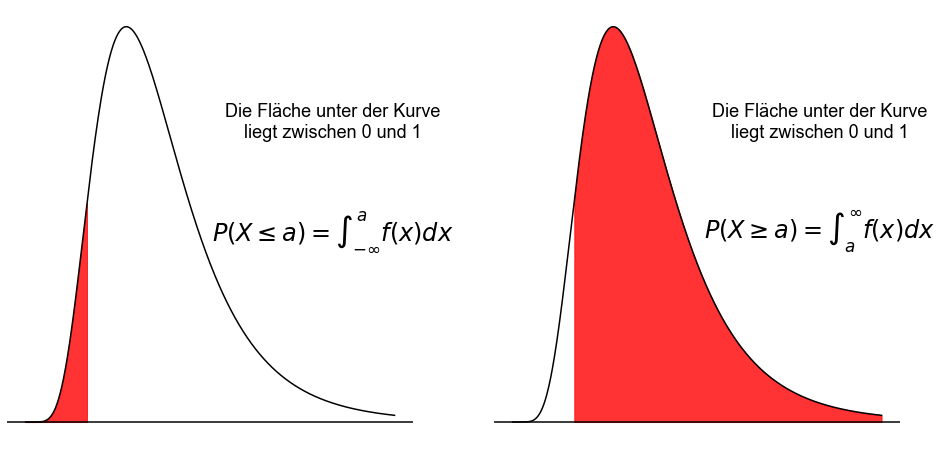

In [3]:
from scipy.stats import f
import numpy as np
import matplotlib.pyplot as plt

a = 0.5
v1 = 20
v2 = 20
x = np.linspace(0, 3, 1000)
fig, ax = plt.subplots(figsize=(16, 8), ncols=2)


for _ax in ax:
    _ax.plot(x, f.pdf(x, v1, v2), color="k")
    _ax.axhline(0, color="k")
    _ax.axes.axis("off")
    _ax.text(
        2.5,
        0.7,
        s="Die Fläche unter der Kurve\nliegt zwischen 0 und 1",
        horizontalalignment="center",
        size=18,
    )


ax[0].fill_between(x, f.pdf(x, dfn=v1, dfd=v2), where=x <= a, color="r", alpha=0.8)
ax[0].text(
    2.5,
    0.45,
    s=r"$P(X \leq a) = \int_{-\infty}^a f(x)dx$",
    horizontalalignment="center",
    size=24,
)


ax[1].fill_between(x, f.pdf(x, dfn=v1, dfd=v2), where=x >= a, color="r", alpha=0.8)
ax[1].text(
    2.5,
    0.45,
    s=r"$P(X \geq a) = \int_a^\infty f(x)dx$",
    horizontalalignment="center",
    size=24,
)

Die Wahrscheinlichkeit, dass eine kontinuierliche Zufallsvariable $x$ einen Wert innerhalb eines bestimmten Intervalls annimmt, ist durch die Fläche unter der Kurve zwischen den beiden Grenzen des Intervalls gegeben. Der Wert der farbige Fläche unter der Kurve von $a$ bis $b$ in der folgenden Abbildung gibt die Wahrscheinlichkeit an, dass $x$ in das Intervall $[a \ $,$ \ b]$ fällt.

Text(2.2, 0.4, '$P(a\\leq  x\\leq  b) = \\int_a^b f(x)dx$')

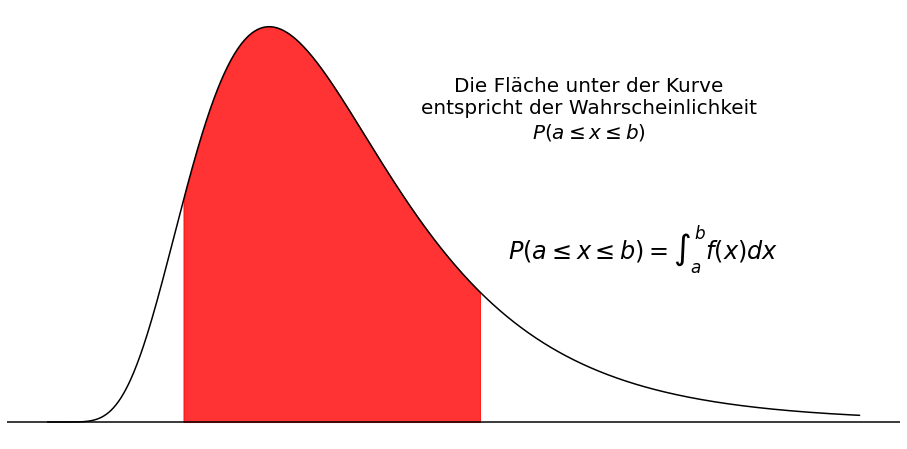

In [3]:
from scipy.stats import f
import numpy as np
import matplotlib.pyplot as plt
a=0.5
b=1.6
v1 = 20
v2 = 20
x = np.linspace(0, 3, 1000)
fig, ax = plt.subplots(figsize=(16,8))
ax.plot(x, f.pdf(x, v1, v2), color="k")
ax.fill_between(x, f.pdf(x,dfn=v1, dfd=v2), where=(x >= a) & (x <= b), color="r", alpha=0.8)
ax.axhline(0, color="k")
ax.axes.axis("off")

ax.text(
    2,
    0.7,
    s="Die Fläche unter der Kurve\nentspricht der Wahrscheinlichkeit\n$P(a\leq  x\leq  b)$",
    horizontalalignment="center",
    size=20,
)

ax.text(
    2.2,
    0.4,
    s=r"$P(a\leq  x\leq  b) = \int_a^b f(x)dx$",
    horizontalalignment="center",
    size=24,
)



\begin{align}
P(a \le x \le b) & = \int_{a}^{b}f(x)dx\\
 & = P(x \le b) - P(x \le a)  \\
 & = \int_{-\infty}^{b}f(x)dx - \int_{-\infty}^{a}f(x)dx 
\end{align}

Man beachte, dass das Intervall $a\le x \le b$ besagt, dass $x$ größer oder gleich $a$, aber kleiner oder gleich $b$ ist.

Bei einer kontinuierlichen Wahrscheinlichkeitsverteilung wird die Wahrscheinlichkeit immer für ein Intervall berechnet. **Die Wahrscheinlichkeit, dass eine kontinuierliche Zufallsvariable $x$ einen einzigen Wert annimmt, ist immer Null**. Das liegt daran, dass die Wahrscheinlichkeit, genau einen Wert aus einer unendlichen Anzahl von Werten $\in \mathbb R$ zu wählen, gleich Null ist. Im geometrischen Sinne bedeutet dies, dass die Fläche einer Linie, die einen einzigen Punkt darstellt, Null ist.

$$P(x) = 0$$

Daraus lässt sich ableiten, dass für eine stetige Zufallsvariable gilt

$$P(a \le x \le b) = P(a < x < b)$$

Mit anderen Worten: Die Wahrscheinlichkeit, dass $x$ einen Wert im Intervall $a$ bis $b$ annimmt, ist gleich groß, unabhängig davon, ob die Werte $a$ und $b$ im Intervall enthalten sind oder nicht.